In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.io import imread,imsave,imshow
from skimage.color import rgb2gray
from scipy.stats import norm, kurtosis, entropy, skew
from skimage.feature import graycoprops,graycomatrix
import cv2

#### Os seguintes valores são calculado com o histograma e são largamente utilizados para representar imagens:

- Média (INMB)
- Variância (INMB)
- Skewness (INMB)
- Kurtosis (Eu acho que tá ok!)
- Energia (Eu acho que tá ok!)
- Entropia (Eu acho que tá ok!)

In [13]:
def Ler_Cinza(imagem):
    # Função para realizar a leitura de uma imagem e retornar a imagem cinza.
    img = imread(imagem)
    cinza = rgb2gray(img)
    return cinza

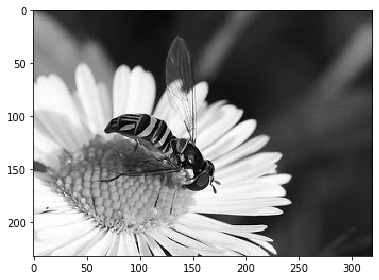

In [14]:
imagem = 'daisy.jpg'
cinza = cv2.imread(imagem,0)
imshow(cinza)

In [15]:
def Retorna_Histograma(Imagem):  
    Linhas, Colunas = Imagem.shape
    Array = []
    Valores = []
    for I in range(256):
        Array.append(0)
        Valores.append(I)
    for L in range(Linhas):
        for C in range(Colunas):
            # print(Imagem[L][C])
            Array[int(Imagem[L][C])] += 1   
    return [Array,Valores]

In [34]:
def Descritor_Histograma(imagem):
    Histograma = Retorna_Histograma(imagem)
    media = np.average(Histograma[0])
    variancia = np.var(Histograma[0])
    s = skew(Histograma[0])
    kur = kurtosis(Histograma[0])
    good = graycomatrix(imagem,[0],[0])
    ener = graycoprops(good,'energy')
    ent = entropy(Histograma[0])
    return {
        'histograma': Histograma[0], 
        'media': media, 
        'var': variancia,
        'skewness': s, 
        'kurtosis': kur, 
        'energy': ener, 
        'entropy': ent}

In [35]:
print(Descritor_Histograma(cinza))

{'histograma': [97, 18, 26, 25, 27, 37, 27, 35, 28, 61, 89, 142, 227, 145, 148, 177, 222, 334, 421, 480, 568, 590, 571, 630, 663, 605, 605, 651, 657, 709, 859, 1018, 930, 928, 1013, 925, 957, 956, 940, 962, 1036, 871, 756, 606, 598, 648, 612, 592, 532, 521, 526, 481, 530, 563, 543, 542, 540, 503, 447, 419, 461, 372, 422, 380, 375, 348, 287, 277, 257, 255, 220, 230, 274, 274, 275, 318, 294, 259, 270, 216, 173, 168, 164, 147, 191, 158, 135, 162, 167, 150, 155, 151, 123, 133, 147, 146, 124, 123, 139, 117, 142, 121, 141, 151, 128, 114, 129, 138, 123, 123, 113, 127, 117, 115, 95, 107, 116, 103, 109, 109, 112, 120, 116, 111, 99, 123, 96, 102, 131, 135, 123, 123, 119, 141, 137, 119, 153, 160, 177, 205, 243, 217, 235, 247, 208, 188, 183, 171, 171, 151, 183, 188, 184, 198, 189, 188, 171, 157, 167, 137, 149, 146, 148, 114, 113, 132, 168, 129, 121, 154, 157, 139, 115, 147, 104, 130, 120, 133, 128, 130, 131, 133, 124, 119, 131, 132, 130, 135, 137, 139, 132, 158, 140, 133, 169, 142, 157, 171, 172, 